# STA160 Data Science 2021 Spring

## Part8- PyTorch & Neural Networks

## Installation:

The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

- Anaconda:

conda install torchvision -c pytorch

- pip:

pip install torchvision


What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

Getting Started
---------------

Tensors


Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [1]:
import torch

Construct a 5x3 matrix, uninitialized:



In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[1.1210e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


Construct a randomly initialized matrix:



In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1673, 0.1964, 0.2310],
        [0.1703, 0.7348, 0.7921],
        [0.6451, 0.1753, 0.1679],
        [0.2780, 0.4484, 0.1446],
        [0.1021, 0.8632, 0.0920]])


Construct a matrix filled zeros and of dtype long:



In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [6]:
x = torch.empty(2, 3)
torch.zeros_like(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

Construct a tensor directly from data:



In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.4553, -0.0965, -0.3293],
        [-2.3772, -0.2698, -1.4993],
        [ 0.9402,  0.3476, -0.8559],
        [-0.3800,  0.4681, -0.8169],
        [-1.1006, -1.7835,  0.2945]])


Get its size:

Note: ``torch.Size`` is in fact a tuple, so it supports all tuple operations.


In [29]:
x = torch.rand(2, 3)
print(x.size())

torch.Size([2, 3])


Addition:

In [22]:
y = torch.rand(2, 3)
print(x + y)

tensor([[0.7437, 0.9448, 0.8219],
        [0.7497, 0.3197, 0.9661]])


Addition: syntax 2

In [23]:
print(torch.add(x, y))

tensor([[0.7437, 0.9448, 0.8219],
        [0.7497, 0.3197, 0.9661]])


Addition: in-place

Note: Any operation that mutates a tensor in-place is post-fixed with an ``_``. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.


In [24]:
# adds x to y
y.add_(x)
print(y)

tensor([[0.7437, 0.9448, 0.8219],
        [0.7497, 0.3197, 0.9661]])


You can use standard NumPy-like indexing with all bells and whistles!

In [25]:
print(x)
print(x[:, 1])

tensor([[0.1628, 0.6065, 0.8093],
        [0.5617, 0.2061, 0.0247]])
tensor([0.6065, 0.2061])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [39]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [27]:
# vectorize it row by row
print(x)
print(y)
print(z)

tensor([[-0.6368, -1.8195,  2.6039, -0.2272],
        [ 1.3554, -1.2306,  1.0746,  2.0638],
        [ 0.8407, -0.9725, -1.5006,  0.5728],
        [ 0.9492,  0.0755,  0.2407, -0.2885]])
tensor([-0.6368, -1.8195,  2.6039, -0.2272,  1.3554, -1.2306,  1.0746,  2.0638,
         0.8407, -0.9725, -1.5006,  0.5728,  0.9492,  0.0755,  0.2407, -0.2885])
tensor([[-0.6368, -1.8195,  2.6039, -0.2272,  1.3554, -1.2306,  1.0746,  2.0638],
        [ 0.8407, -0.9725, -1.5006,  0.5728,  0.9492,  0.0755,  0.2407, -0.2885]])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [28]:
x = torch.randn(1)
print(x)
print(x.item())  # only one element tensors can be converted to Python scalars

tensor([-0.7578])
-0.7578176259994507


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  here https://pytorch.org/docs/torch.

In [63]:
# Returns the total number of elements in the input tensor.
a = torch.randn(1, 2, 3)
print(torch.numel(a))
a = torch.zeros(4,4)
print(torch.numel(a))

6
16


In [88]:
torch.tensor([]).size()

torch.Size([0])

In [91]:
torch.tensor([2]).size()

torch.Size([1])

In [93]:
torch.tensor([[2,3],[4,5]]).size()

torch.Size([2, 2])

In [103]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [104]:
torch.full((2, 3), 3.141592)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])

In [108]:
x = torch.randn(2, 2)
print(x)

print(torch.cat((x, x, x), 0)) # concatenate on the row side

print(torch.cat((x, x, x), 1)) # concatenate on the column side

tensor([[-0.0260, -0.7049],
        [-0.3855,  0.1400]])
tensor([[-0.0260, -0.7049],
        [-0.3855,  0.1400],
        [-0.0260, -0.7049],
        [-0.3855,  0.1400],
        [-0.0260, -0.7049],
        [-0.3855,  0.1400]])
tensor([[-0.0260, -0.7049, -0.0260, -0.7049, -0.0260, -0.7049],
        [-0.3855,  0.1400, -0.3855,  0.1400, -0.3855,  0.1400]])


In [111]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
indices = torch.tensor([0, 2])
print(torch.index_select(x, 0, indices)) # extract 0, 2 rows
print(torch.index_select(x, 1, indices)) # extract 0, 2 columns

tensor([[1, 2, 3],
        [7, 8, 9]])
tensor([[1, 3],
        [4, 6],
        [7, 9]])


In [13]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mask = x.ge(5)
print(mask)
print(torch.masked_select(x, mask))

tensor([[False, False, False],
        [False,  True,  True],
        [ True,  True,  True]])
tensor([5, 6, 7, 8, 9])


In [14]:
x[x>=5]

tensor([5, 6, 7, 8, 9])

In [119]:
# if cond 1, return x; otherwise, return y
x = torch.randn(3, 2)
y = torch.ones(3, 2)
print(x)
print(torch.where(x > 0, x, y))

tensor([[ 1.2921, -0.0431],
        [-1.0000, -0.0130],
        [-0.1106,  1.3366]])
tensor([[1.2921, 1.0000],
        [1.0000, 1.0000],
        [1.0000, 1.3366]])


In [132]:
torch.normal(mean=0.5, std=torch.tensor([1.,2.,3.,4.,5.]))

tensor([ 1.0256,  1.1244,  5.9637, -0.5277, -6.5691])

In [134]:
torch.normal(0, 1, size=(2, 4))

tensor([[ 1.1213, -0.7835,  0.3443,  1.9041],
        [-0.6104, -1.6461,  0.7373,  0.1945]])

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations (if the Torch Tensor is on CPU), and changing one will change
the other.

Converting a Torch Tensor to a NumPy Array:



In [53]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [54]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [55]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor:

See how changing the np array changed the Torch Tensor automatically



In [56]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

Autograd: Automatic Differentiation
===================================

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.

Tensor
--------

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with
``requires_grad=True``, but for which we don't need the gradients.


If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``
argument that is a tensor of matching shape.




In [5]:
# Create a tensor and set requires_grad=True to track computation with it
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [6]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [7]:
z = y * y * 3
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


In [8]:
out = z.mean()
print(out)

tensor(27., grad_fn=<MeanBackward0>)


Let's backprop now. You should have got a matrix of ``4.5``. Let’s call the ``out`` *Tensor* “$o$”.
We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.
Therefore,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.




In [9]:
out.backward()

Print gradients d(out)/dx

In [10]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Artificial Neural Networks

Artificial neural networks (ANN) is a computing system vaguely inspired by the biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules. 

ANNs are composed of artificial neurons which retain the biological concept of neurons, which receive input, combine the input with their internal state (activation) and an optional threshold using an activation function, and produce output using an output function. The initial inputs are external data, such as images and documents. The ultimate outputs accomplish the task, such as recognizing an object in an image. The important characteristic of the activation function is that it provides a smooth, differentiable transition as input values change, i.e. a small change in input produces a small change in output.

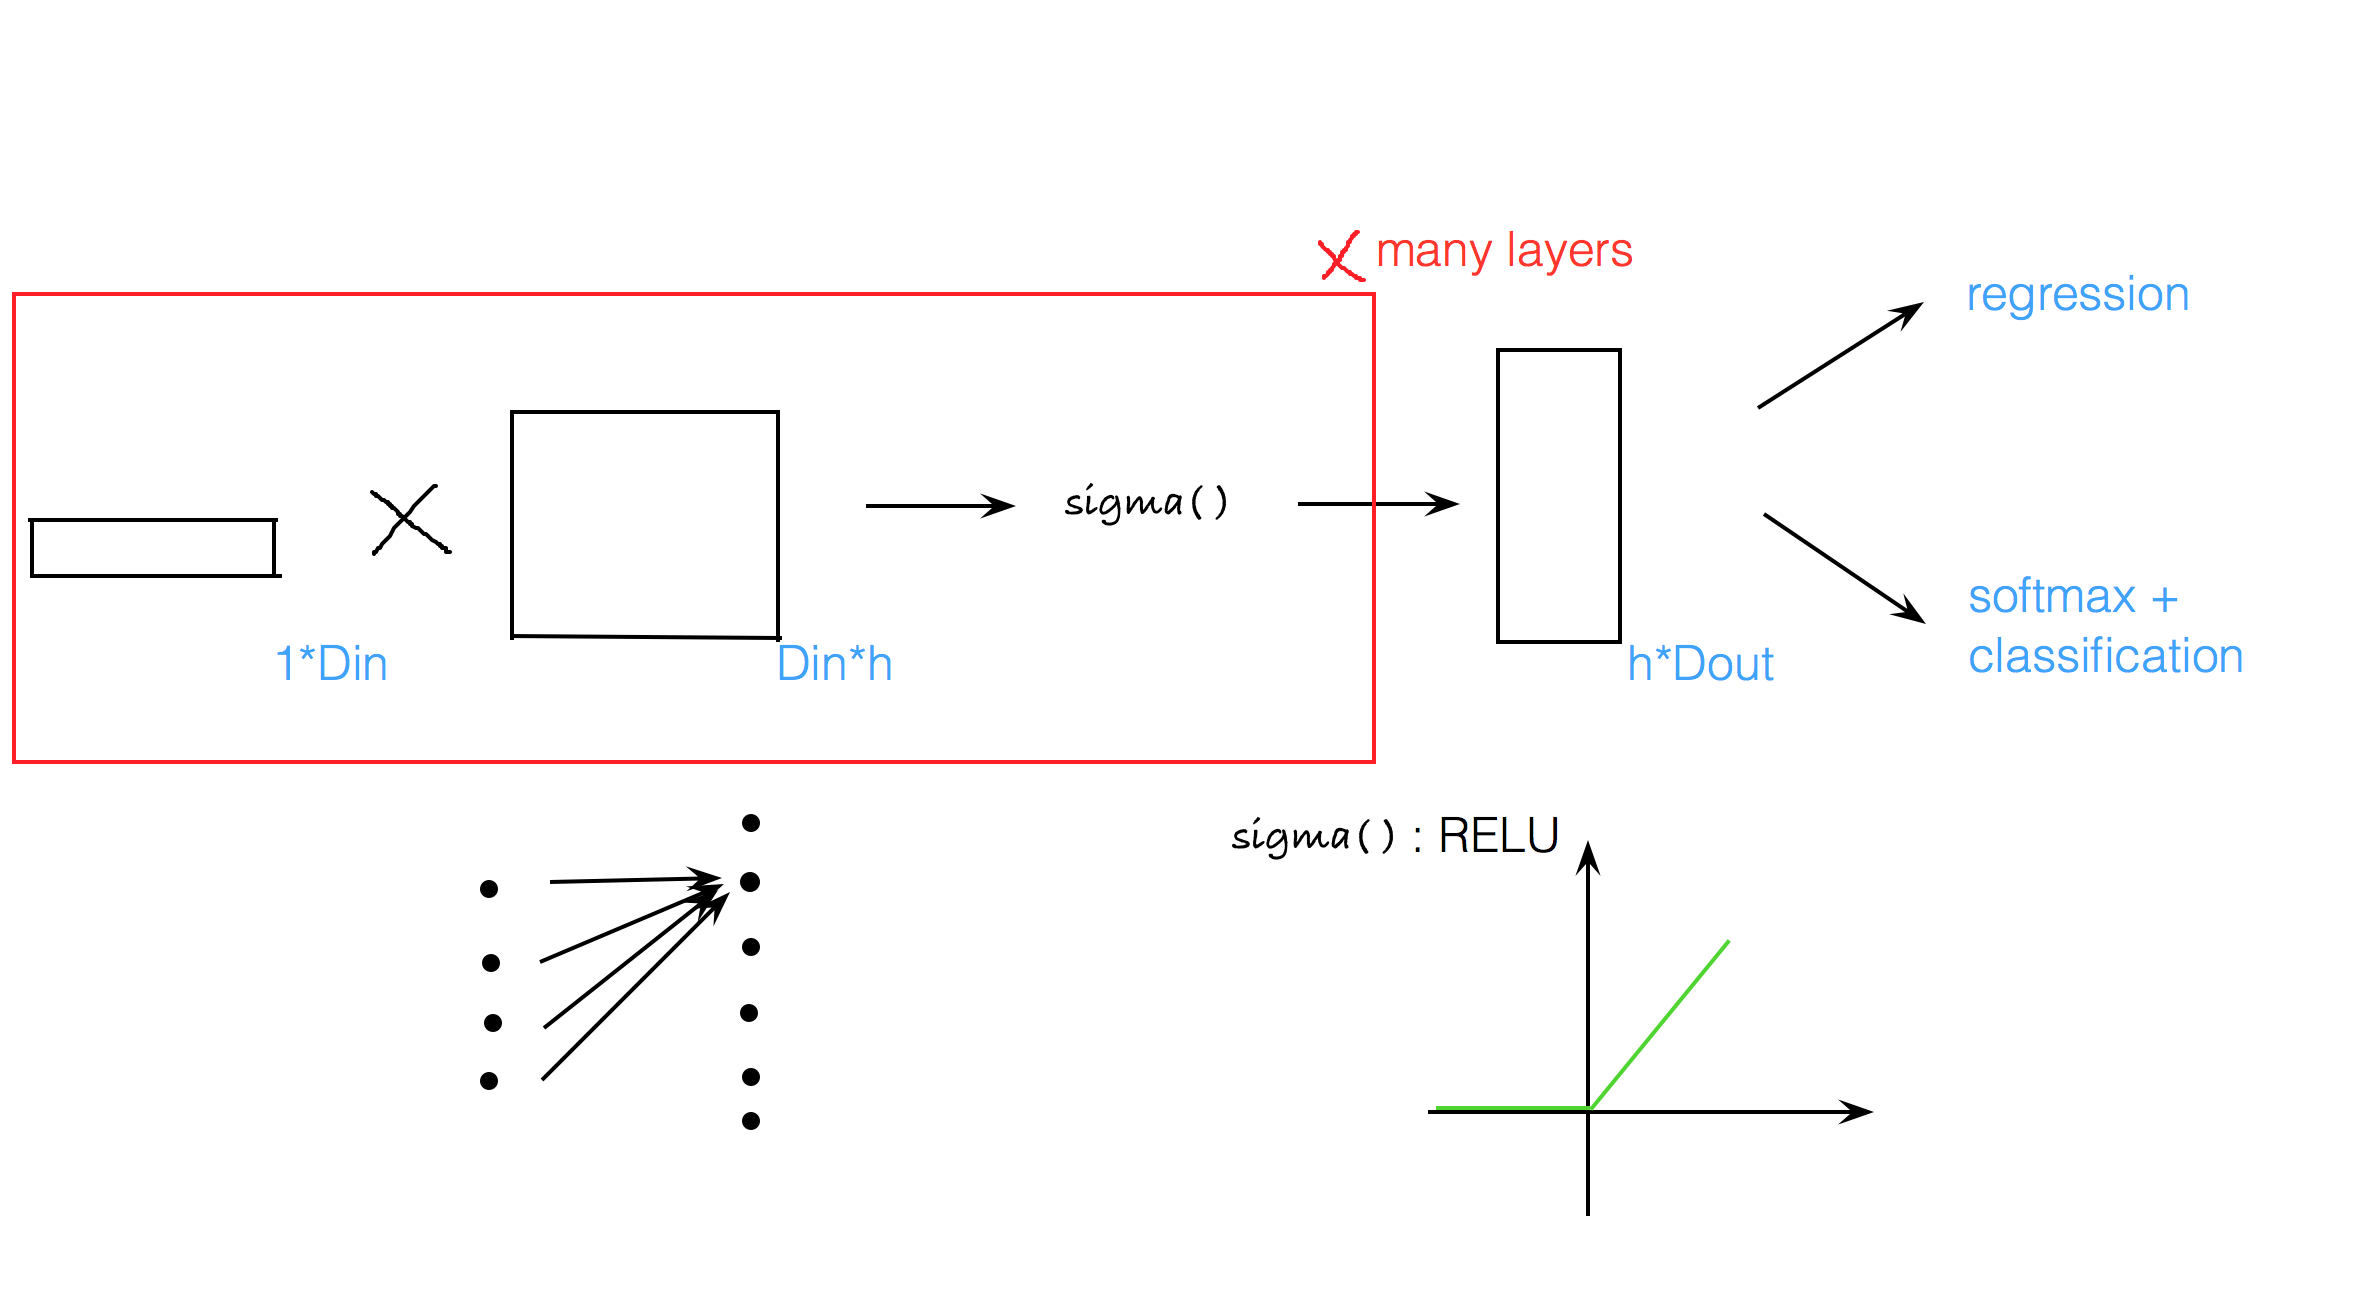

In [89]:
from IPython.display import Image
Image("Whiteboard.png")

## Backpropogation

http://neuralnetworksanddeeplearning.com/chap2.html

The weight $w^l$ for the connection from the $(l−1)$th layer to the $l$th layer, $b^l$ for the bias of the $l$th layer, and $a^l$ for the activation of the $l$th layer. 

The activation $a^l$ in the $l$th layer is related to the activations in the $(l−1)$th layer by the equation.

$$z^l=a^{l-1} w^l  + b^l$$

$$a^l=\sigma(z^l)$$

for $l=1, 2, 3, ..., L$.

The cost function for the final layer: (take regression for example)

$$C= \frac{1}{N} \sum_x ||y(x)-a^L(x)||^2$$

Want to calculate $\frac{\partial C}{\partial w^l}$ and $\frac{\partial C}{\partial b^l}$ and employ gradient descent.

## Example I: regression for simulated data

Consider a two-layer neural network,
$$ \hat{y} =  \sigma( x' w_1 + b_1 ) w_2 + b_2 $$

For mini-batch samples:

$$ \hat{Y} = \sigma( X W_1 + B_1 ) W_2 + B_2 $$

$X$ is a $N \times D_{in}$ data matrix, $W_1$ is a $D_{in} \times H$ weight matrix, $W_2$ is a $H \times D_{out}$ weight matrix, and $B_1$ and $B_2$ are two bias matrices.

$\sigma(x)=max(x,0)$ it is called RELU.

$N$ can be the size of a mini-batch sample.

So, input $N \times D_{in}$ data and we'll get $N \times D_{out}$ $\hat{Y}$ out.

The cost function:

$$C= \frac{1}{N} ||Y- \hat{Y}||_F^2 = \frac{1}{N} \sum_{i=1}^N ||y_i- \hat{y}_i||^2$$


## Numpy:
Before introducing PyTorch, we will first implement the network using numpy. Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a two-layer network to random data by manually implementing the forward and backward passes through the network using numpy operations:

In [3]:
import numpy as np
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)


##################################################
# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # 1.Forward pass: compute predicted y
    h = x.dot(w1)
    #Compare two arrays and returns a new array containing the element-wise maxima.
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # 2.Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 3.Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

99 1131.9074677221054
199 11.015091708102707
299 0.19728041766309184
399 0.004700428573007171
499 0.00013580676363734802


## PyTorch: Tensors and autograd

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

In [ ]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)


##########################################################
# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

## PyTorch: nn

Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In PyTorch, the nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

see Torch.nn: https://pytorch.org/docs/stable/nn.html#

In [54]:
input = torch.randn(64, 10)
# linear layer
m = torch.nn.Linear(10, 50)
#m.requires_grad_(requires_grad=False)  # Change if you don't want autograd record operations on parameters
output = m(input)
output.size()

torch.Size([64, 50])

In [61]:
m.weight.size()

torch.Size([50, 10])

In [62]:
m.bias.size()

torch.Size([50])

In [60]:
# weight and bias are recorded in .parameters()
[p.size() for p in m.parameters()]

[torch.Size([50, 10]), torch.Size([50])]

In [63]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 2.5902621746063232
199 0.04241018369793892
299 0.0012822261778637767
399 5.7179197028744966e-05
499 3.495222927085706e-06


In [64]:
# weight1, bias1, weight2, bias2
[p.size() for p in model.parameters()]

[torch.Size([100, 1000]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

## PyTorch: Custom nn Modules

Sometimes you will want to specify models that are more complex than a sequence of existing Modules; for these cases you can define your own Modules by subclassing nn.Module and defining a forward which receives input Tensors and produces output Tensors using other modules or other autograd operations on Tensors.
In this example we implement our two-layer network as a custom Module subclass:

In [65]:
import torch.nn.functional as F

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

## PyTorch: optim

Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters (with torch.no_grad() or .data to avoid tracking history in autograd). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.
The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.
In this example we will use the nn package to define our model as before, but we will optimize the model using the Adam algorithm provided by the optim package:

see Torch.optim: https://pytorch.org/docs/stable/optim.html

In [67]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# MSE loss
criterion = torch.nn.MSELoss(reduction='sum')

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters().
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 61.02461242675781
199 1.0088218450546265
299 0.0061424607411026955
399 3.12036499963142e-05
499 1.3198291526350658e-07


## Example II: classification for Iris data

In [69]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

DataLoader actually requires is an input that subclasses ``Dataset``. You can either write your own dataset class that subclasses ``Dataset`` or use ``TensorDataset`` or ``from_numpy`` as below:

Torch data loader: https://pytorch.org/docs/stable/data.html

In [70]:
from torch.utils.data import TensorDataset, random_split

# transform to torch tensor
tensor_x = torch.from_numpy(X)
tensor_y = torch.from_numpy(y)

dataset = TensorDataset(tensor_x,tensor_y) # create your datset

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5} training samples'.format(train_size))
print('{:>5} validation samples'.format(val_size))

  120 training samples
   30 validation samples


In [79]:
# training X
print(train_dataset.dataset.tensors[0].size())
# training y
print(train_dataset.dataset.tensors[1].size())

torch.Size([150, 4])
torch.Size([150])


In [80]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

## DataLoader:
# shuffle: set to True to have the data reshuffled at every epoch

# sampler: defines the strategy to draw samples from the dataset. 
#          If specified, shuffle must be False.

# drop_last: drop_last (bool, optional) – set to True to drop the last incomplete batch, 
#            if the dataset size is not divisible by the batch size. 
#            If False and the size of dataset is not divisible by the batch size, 
#            then the last batch will be smaller. 


# The DataLoader needs to know our batch size for training, so we specify it here.
batch_size = 10

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            shuffle=True,
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            shuffle=False,
            batch_size = batch_size # Evaluate with this batch size.
        )

In [81]:
dataiter = iter(train_dataloader)
print(dataiter.next()[0]) # 10 samples in a batch
print(dataiter.next()[1]) # 10 labels

tensor([[4.9000, 3.1000, 1.5000, 0.1000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [4.9000, 3.1000, 1.5000, 0.2000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [4.4000, 3.2000, 1.3000, 0.2000]], dtype=torch.float64)
tensor([1, 0, 0, 2, 1, 2, 0, 0, 0, 2])


In [82]:
len(train_dataloader) # 12 mini-batches

12

In [92]:
# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in=4, H=10, D_out=3)

# Construct our loss function and an Optimizer. The call to model.parameters().
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4

# cross entropy loss for classification
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


train_loss_record=[]  # record training loss for each epoch
valid_loss_record=[]  # record validation loss for each epoch


epochs=50 # number of epochs

for epoch in range(epochs):  # loop over the dataset multiple times
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
    print('Training...')
    
    avg_train_loss=0 # record average loss in training
    
    for i, data in enumerate(train_dataloader, 0): ## enumerate(iterable, start=0)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        # for each barch, reset gradients to 0
        model.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.float()) # from torch.DoubleTensor to torch.FloatTensor
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        if i % 5==4: # print statistics every 5 mini-batches
            print('Batch {:>5,}  of  {:>5,}. Loss: {:>5,} '
                  .format(i+1, len(train_dataloader), loss.item()))
        
        avg_train_loss+=loss.item()/len(train_dataloader) # total loss
    
    train_loss_record.append(avg_train_loss)

    
    print("")
    print('Vlidation...')
    
    avg_valid_loss=0 # record average loss in validation
    
    correct = 0 # record accuracy for each epoch
    total = 0
    
    with torch.no_grad():
        
        for data in validation_dataloader:
            inputs, labels = data
            outputs = model(inputs.float()) # prediction
            
            _, predicted = torch.max(outputs.data, 1) # make a decision (maxmization , indices)
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # calculate classification accuracy
            
            loss = criterion(outputs, labels)
            avg_valid_loss+=loss.item()/len(validation_dataloader) # total loss
            
    valid_loss_record.append(avg_valid_loss)
            
    print('Accuracy on the validation set: %d %%' % (100 * correct / total))




======== Epoch 1 / 50 ========
Training...
Batch     5  of     12. Loss: 1.1045094728469849 
Batch    10  of     12. Loss: 1.1502255201339722 

Vlidation...
Accuracy on the validation set: 33 %

======== Epoch 2 / 50 ========
Training...
Batch     5  of     12. Loss: 1.0560808181762695 
Batch    10  of     12. Loss: 0.8901211023330688 

Vlidation...
Accuracy on the validation set: 70 %

======== Epoch 3 / 50 ========
Training...
Batch     5  of     12. Loss: 0.8612669110298157 
Batch    10  of     12. Loss: 0.8992822766304016 

Vlidation...
Accuracy on the validation set: 76 %

======== Epoch 4 / 50 ========
Training...
Batch     5  of     12. Loss: 0.6194071769714355 
Batch    10  of     12. Loss: 0.5989850163459778 

Vlidation...
Accuracy on the validation set: 70 %

======== Epoch 5 / 50 ========
Training...
Batch     5  of     12. Loss: 0.3615417778491974 
Batch    10  of     12. Loss: 0.5690819621086121 

Vlidation...
Accuracy on the validation set: 93 %

======== Epoch 6 / 50 ==


Vlidation...
Accuracy on the validation set: 86 %

======== Epoch 46 / 50 ========
Training...
Batch     5  of     12. Loss: 0.7054948210716248 
Batch    10  of     12. Loss: 0.08606778085231781 

Vlidation...
Accuracy on the validation set: 83 %

======== Epoch 47 / 50 ========
Training...
Batch     5  of     12. Loss: 0.017275186255574226 
Batch    10  of     12. Loss: 0.03674527257680893 

Vlidation...
Accuracy on the validation set: 96 %

======== Epoch 48 / 50 ========
Training...
Batch     5  of     12. Loss: 0.05112684890627861 
Batch    10  of     12. Loss: 0.09253083169460297 

Vlidation...
Accuracy on the validation set: 96 %

======== Epoch 49 / 50 ========
Training...
Batch     5  of     12. Loss: 0.07818500697612762 
Batch    10  of     12. Loss: 0.039716076105833054 

Vlidation...
Accuracy on the validation set: 96 %

======== Epoch 50 / 50 ========
Training...
Batch     5  of     12. Loss: 0.08148541301488876 
Batch    10  of     12. Loss: 0.03584938868880272 

Vlidatio

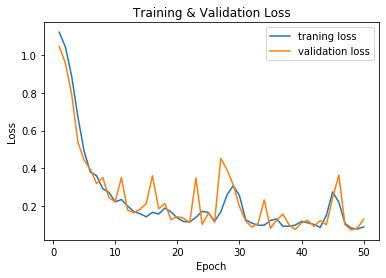

In [93]:
import matplotlib.pyplot as plt

plt.plot(range(1,epochs+1),train_loss_record, label='traning loss')
plt.plot(range(1,epochs+1),valid_loss_record, label='validation loss')

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Save and load the model parameters.

In [86]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0727, -0.2039, -0.2838,  0.2216],
                      [ 0.0116, -0.9105,  1.4379,  0.4981],
                      [ 0.6155,  0.1180, -0.5526, -0.6396],
                      [ 0.1495, -0.3044, -0.5369, -0.1404],
                      [-0.1052, -0.3321, -0.3334, -0.3696],
                      [-0.2437, -0.3368,  0.2952,  0.4449],
                      [ 1.1162,  1.2871, -1.3681, -1.6032],
                      [-0.3778, -0.0842,  0.0977, -0.4945],
                      [-1.0613, -0.7235,  1.5827,  1.8436],
                      [ 0.0266, -0.2149, -0.0460, -0.0877]])),
             ('linear1.bias',
              tensor([-0.4235, -0.3707,  0.4669, -0.2685,  0.4282, -0.3375,  0.3724,  0.2342,
                      -0.6877,  0.2545])),
             ('linear2.weight',
              tensor([[-0.2278, -1.4915,  0.3709,  0.0313, -0.0137, -0.2035,  0.8442, -0.1131,
                       -0.0692, -0.2706],
                      [-0.043

In [163]:
PATH = './iris_network.pth'
torch.save(model.state_dict(), PATH)

Next, let's load back in our saved model.

In [165]:
model = TwoLayerNet(D_in=4, H=10, D_out=3)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>